In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def fact(x):
    result = 1
    for i in range(x):
        result *= (i + 1)
    return result

# $P_e = \sum_{t : 2t + 1 > d}(\frac{n!}{t!(n - t)!}p^t(1-p)^{n-t})$
def p_e(n, p, d):
    result = 0
    for t in range(n + 1):
        if 2 * t + 1 > d:
            result += fact(n) / fact(t) / fact(n - t) * p ** t * (1 - p) ** (n - t)
    return result

In [2]:
# dd = [0, 0, 0, 0, 4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8]

nn = [x * 2 for x in range(4, 17)]
p1 = []
p2 = []
p3 = []
for n in nn:
    k = n // 2
    d = dd[k]
#     p1.append(p_e(n, 0.1, d))
#     p1.append(math.log(p_e(n, 0.1, d)))
#     p2.append(p_e(n, 0.01, d))
#     p2.append(math.log(p_e(n, 0.01, d)))
#     p3.append(p_e(n, 0.001, d))
    p3.append(math.log(p_e(n, 0.001, d)))
        
# plt.plot(nn, p1, 'r')
# plt.plot(nn, p2, 'g')
plt.plot(nn, p3, 'b')
plt.title('Зависимость ошибки от длины кодов при p = 0.001')
plt.xlabel('длина кода n')
plt.ylabel('вероятность ошибки декодирования')
plt.savefig('task3.png')
plt.show()
        

NameError: name 'dd' is not defined

In [3]:
print(p_e(n, 0.1, d))

0.39969409753596635


In [65]:
# (n-k) * n
H = [[0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1],
 [0 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 1],
 [1 , 0 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0],
 [0 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 0]]
# k * n
G = [[0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0],
[0 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1],
[1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 0],
[1 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0],
[0 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0],
[1 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0]]

res = 0

n = 10
k = 6
    
Ht = np.matrix(H).transpose()
# print(np.matrix(G) * Ht)

tt = dict()

for x in range(2 ** n):
    xx = [int(2 ** (n - i - 1) & x > 0) for i in range(n)]
    s = [x % 2 for x in np.matrix(xx) * Ht]
    if (tt.get(str(s))== None or sum(xx) < sum(tt[str(s)])):
        tt[str(s)] = xx

for x in sorted(tt.keys()):
    print(x, tt[x])

In [51]:
# Варшамова-Гилберта

def cnk(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def getD(n, k):
    a = 2 ** (n - k)
    b = cnk(n - 1, 0)
    d = 2
    while (a > b):
        d += 1
        b += cnk(n - 1, d - 2)
    return d - 1

def vec2Num(vec):
    n = len(vec)
    return sum([2 ** (n - i - 1) * vec[i] for i in range(n)])
    
def num2Vec(x, n):
    return [int(2 ** (n - i - 1) & x > 0) for i in range(n)]

def checkRowLI(vectors, d, positions=[]):
    if len(positions) == d:
        v = []
        for p in positions:
            v.append(vectors[p].tolist()[0])
        rank = np.linalg.matrix_rank(np.matrix(v))
        return rank == len(v)
    start = 0
    if len(positions) > 0:
        start = positions[-1] + 1
    for i in range(start, len(vectors)):
        if not checkRowLI(vectors, d, positions + [i]):
            return False
    return True
        
def checkLI(vectors, d):
    Vt = np.matrix(vectors).transpose()
    rankV = np.linalg.matrix_rank(np.matrix(vectors))
    return rankV == len(vectors) and checkRowLI(Vt, d - 1) and not checkRowLI(Vt, d)

def bruteForceVectors(n, r, d, vectors=[]):
    if r == 0:
        if checkLI(vectors, d):
            return vectors
        return []
    start = 1
    if len(vectors) > 0:
        start = vec2Num(vectors[-1]) + 1
    for x in range(start, 2 ** n):
        vectors.append(num2Vec(x, n))
        res = bruteForceVectors(n, r - 1, d, vectors)
        if len(res) > 0:
            return res
        vectors.pop()
    return []

def bruteForceVectors2(n, r, d):
    for x in range(2 ** n):
        vectors = [num2Vec(x, n)]
        for i in range(r - 1):
            v = vectors[-1]
            v = v[-2:] + v[:-2]
            vectors.append(v)
        if checkLI(vectors, d):
            return vectors
    return []

def generateH(n, k):
    r = n - k
    d = getD(n, k)
    print('d =', d)
    H = bruteForceVectors2(n, r, d)
    if len(H) == 0:
        H = bruteForceVectors(n, r, d)
    return H

for x in generateH(20, 15):
    print(*x, '\\\\')

d = 3
0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 \\
1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 \\
0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 \\
1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 \\
0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 \\


## Глава 4, задача 5, БКДР

In [26]:
import math 

p_0 = 0.1
y = [0, 1, 1, 1, 1]
n = len(y)

# graph = [[(vertex, edge, level)]]
graph = [[(1, 0, 0), (2, 1, 0)], # 0
         [(3, 0, 1), (4, 1, 1)], # 1
         [(6, 0, 1), (5, 1, 1)], # 2
         [(7, 0, 2)], # 3
         [(8, 1, 2)], # 4
         [(9, 0, 2)], # 5
         [(10, 1, 2)], # 6
         [(11, 0, 3)], # 7
         [(12, 0, 3)], # 8
         [(11, 1, 3)], # 9
         [(12, 1, 3)], # 10
         [(13, 0, 4)], # 11
         [(13, 1, 4)], # 12
         []] # 13

n_vertex = len(graph)

gamma = [[0] * n_vertex for i in range(n_vertex)]

def get_p(edge_value, level, prob):
    if edge_value == y[level]:
        return 1 / prob * (1 - p_0)
    return 1 / prob * p_0


for v_from in range(n_vertex):
    for v_to, edge_value, level in graph[v_from]:
        gamma[v_from][v_to] = get_p(edge_value, level, len(graph[v_from]))

print('$gamma$')
for v_from in range(n_vertex):
    for v_to in range(n_vertex):
        if gamma[v_from][v_to] != 0:
            print('$gamma_' + str(v_from) + '_' + str(v_to) + " = %0.2f$" % gamma[v_from][v_to])
print()
        
r_graph = [[] for i in range(n_vertex)]
for v_from in range(n_vertex):
    for v_to, edge_value, level in graph[v_from]:
        r_graph[v_to].append(v_from)


alpha = [0] * n_vertex

alpha[0] = 1

for v_to in range(1, n_vertex):
    for v_from in r_graph[v_to]:
        alpha[v_to] += alpha[v_from] * gamma[v_from][v_to]

print('$alpha$')
for i, a in enumerate(alpha):
    print('$alpha_' + str(i) + " = %0.5f$" % a)
print()

beta = [0] * n_vertex

beta[n_vertex - 1] = 1

for v_from in range(n_vertex - 2, -1, -1):
    for v_to, edge_value, level in graph[v_from]:
        beta[v_from] += beta[v_to] * gamma[v_from][v_to]
    
print('$beta$')
for i, b in enumerate(beta):
    print('$beta_' + str(i) + " = %0.5f$" % b)
print()

sigma = [[0] * n_vertex for i in range(n_vertex)]

for v_from in range(n_vertex):
    for v_to, edge_value, level in graph[v_from]:
        sigma[v_from][v_to] = alpha[v_from] * gamma[v_from][v_to] * beta[v_to]

print('$sigma$')
for v_from in range(n_vertex):
    for v_to in range(n_vertex):
        if sigma[v_from][v_to] != 0:
            print('$sigma_' + str(v_from) + '_' + str(v_to) + " = %0.5f$" % sigma[v_from][v_to])
print()

lambdas = [[0, 0] for i in range(n)]

for v_from in range(n_vertex):
    for v_to, edge_value, level in graph[v_from]:
        lambdas[level][edge_value] += sigma[v_from][v_to]

print('$lambda$')        
for level in range(n):
    print("%0.5f" % math.log(lambdas[level][1] / lambdas[level][0]), end=', ')



$gamma$
$gamma_0_1 = 0.45$
$gamma_0_2 = 0.05$
$gamma_1_3 = 0.05$
$gamma_1_4 = 0.45$
$gamma_2_5 = 0.45$
$gamma_2_6 = 0.05$
$gamma_3_7 = 0.10$
$gamma_4_8 = 0.90$
$gamma_5_9 = 0.10$
$gamma_6_10 = 0.90$
$gamma_7_11 = 0.10$
$gamma_8_12 = 0.10$
$gamma_9_11 = 0.90$
$gamma_10_12 = 0.90$
$gamma_11_13 = 0.10$
$gamma_12_13 = 0.90$

$alpha$
$alpha_0 = 1.00000$
$alpha_1 = 0.45000$
$alpha_2 = 0.05000$
$alpha_3 = 0.02250$
$alpha_4 = 0.20250$
$alpha_5 = 0.02250$
$alpha_6 = 0.00250$
$alpha_7 = 0.00225$
$alpha_8 = 0.18225$
$alpha_9 = 0.00225$
$alpha_10 = 0.00225$
$alpha_11 = 0.00225$
$alpha_12 = 0.02025$
$alpha_13 = 0.01845$

$beta$
$beta_0 = 0.01845$
$beta_1 = 0.03650$
$beta_2 = 0.04050$
$beta_3 = 0.00100$
$beta_4 = 0.08100$
$beta_5 = 0.00900$
$beta_6 = 0.72900$
$beta_7 = 0.01000$
$beta_8 = 0.09000$
$beta_9 = 0.09000$
$beta_10 = 0.81000$
$beta_11 = 0.10000$
$beta_12 = 0.90000$
$beta_13 = 1.00000$

$sigma$
$sigma_0_1 = 0.01643$
$sigma_0_2 = 0.00203$
$sigma_1_3 = 0.00002$
$sigma_1_4 = 0.01640$
$sigma_2_5

In [ ]:
## Глава 4, Задача 4

In [23]:
# (n-k) * n
H = [[0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1],
     [0 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 1],
     [1 , 0 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0],
     [0 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 0]]
# k * n
G = [[0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0],
     [0 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1],
     [1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 0],
     [1 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0],
     [0 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0],
     [1 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0]]
from collections import defaultdict

words = [defaultdict(lambda: set()) for i in range(len(H[0]) + 1)]

for i in range(1, len(H[0]) + 1):
    print('длина = ', i, ': {', sep='', end='')
    ss = set()
    for x in range(1 << 6):
        cur_g = [0] * i
        for a in range(6):
            for b in range(i):
                cur_g[b] ^= G[a][b] * (((1 << a) & x) > 0)
#         print(cur_g)        
        cur = [0] * 4
        for j in range(i):
            for k in range(4):
                cur[k] ^= H[k][j] * cur_g[j]
        vv = ''.join(map(str, cur))
        ss.add(vv)
        words[i][vv].add(''.join(map(str, cur_g)))
    print(*sorted(list(ss)), sep=', ', end='}\n\n')
                        
gg = set()
for x in range(1 << 6):
    cur = [0] * 10
    for a in range(6):
        for b in range(10):
            cur[b] ^= G[a][b] * (((1 << a) & x) > 0)
    gg.add(''.join(map(str, cur)))

print(len(list(gg)), sep='\n')

res = set()
for i in range(1, len(H[0])):
    for k, v in words[i].items():
        for k1, v1 in words[i + 1].items():
            for p in v:
                for p1 in v1:
                    if p == p1[:len(p)]:
                        res.add((i, k, k1, p1[len(p)]))
print(*sorted(list(res)), sep='\n')

длина = 1: {0000, 0010}

длина = 2: {0000, 0001, 0010, 0011}

длина = 3: {0000, 0001, 0010, 0011, 1100, 1101, 1110, 1111}

длина = 4: {0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111}

длина = 5: {0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111}

длина = 6: {0000, 0001, 0110, 0111, 1010, 1011, 1100, 1101}

длина = 7: {0000, 0001, 0110, 0111, 1010, 1011, 1100, 1101}

длина = 8: {0000, 0111, 1011, 1100}

длина = 9: {0000, 1100}

длина = 10: {0000}

64
(1, '0000', '0000', '0')
(1, '0000', '0001', '1')
(1, '0010', '0010', '0')
(1, '0010', '0011', '1')
(2, '0000', '0000', '0')
(2, '0000', '1111', '1')
(2, '0001', '0001', '0')
(2, '0001', '1110', '1')
(2, '0010', '0010', '0')
(2, '0010', '1101', '1')
(2, '0011', '0011', '0')
(2, '0011', '1100', '1')
(3, '0000', '0000', '0')
(3, '0000', '0101', '1')
(3, '0001', '0001', '0')
(3, '0001', '0100', '1')
(3, '0010', '0010', '0')
(3, '0010', '0111', '1')
(3

In [24]:
## решетка по порождающей матрице

In [8]:
G = [[1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
     [0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
     [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]]

n = len(G[0])

active = [[0, 4], [1, 6], [2, 8], [4, 7]]

levels = [[] for i in range(n)]
actives = []

for level in range(n):
    active_pos = []
    for i in range(len(active)):
        if level >= active[i][0] and level <= active[i][1]:
            active_pos.append(i)
    actives.append(active_pos)
    for i in range(1 << (len(active_pos))):
        cur = ''
        for j in range(len(active_pos)):
            cur += str(int((i & (1 << j)) > 0))        
        levels[level].append(cur)

print('active positions', *actives)
print(*levels,sep='\n')


for level in range(n - 1):
    for v_from in levels[level]:
        cur = [0, 0, 0, 0]
        if actives[level]
        



active positions [0] [0, 1] [0, 1, 2] [0, 1, 2] [0, 1, 2, 3] [1, 2, 3] [1, 2, 3] [2, 3] [2] []
['0', '1']
['00', '10', '01', '11']
['000', '100', '010', '110', '001', '101', '011', '111']
['000', '100', '010', '110', '001', '101', '011', '111']
['0000', '1000', '0100', '1100', '0010', '1010', '0110', '1110', '0001', '1001', '0101', '1101', '0011', '1011', '0111', '1111']
['000', '100', '010', '110', '001', '101', '011', '111']
['000', '100', '010', '110', '001', '101', '011', '111']
['00', '10', '01', '11']
['0', '1']
['']


In [1]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [ ]:
# print(dot.source)
dot.view()

In [9]:
## 4.2 переборное декодирование по МП и МАВ

In [14]:
G = [[1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
     [0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
     [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]]

n = len(G[0])

p_0 = 0.1
y = '0001110101'

cc = set()
for x in range(1 << len(G)):
    cur = [0] * n
    for a in range(len(G)):
        for b in range(n):
            cur[b] ^= G[a][b] * (((1 << a) & x) > 0)
    c_i = ''.join(map(str, cur))
    cc.add(c_i)

res_c = None
res_p = 0
p_y = 0
for c_i in cc:
    diff = 0
    for i in range(n):
        diff += int(c_i[i] != y[i])
    p_y_c_i = p_0 ** diff * (1 - p_0) ** (n - diff)
    p_y += p_y_c_i * 1 / len(cc)
    if p_y_c_i > res_p:
        res_c = c_i

res_c2 = None
res_p2 = 0
for c_i in cc:
    diff = 0
    for i in range(n):
        diff += int(c_i[i] != y[i])
    p_y_c_i = p_0 ** diff * (1 - p_0) ** (n - diff)
    p_c_i_y = p_y_c_i * 1 / len(cc) / p_y
    if p_c_i_y > res_p2:
        res_c2 = c_i
        
print('p_0 =', p_0)
print('y   =', y)

print('Декодирование по МП')        
print('c_i =', res_c)

print('Декодирование по МАВ')
print('c_i =', res_c2)

p_0 = 0.1
y   = 0001110101
Декодирование по МП
c_i = 0100110011
Декодирование по МАВ
c_i = 0100110011


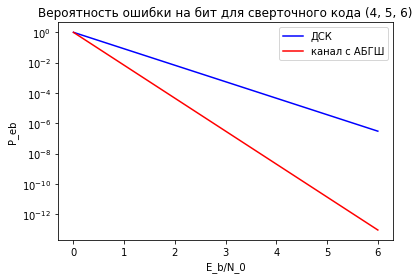

In [64]:
import matplotlib.pyplot as plt
import math 

xx = [i * 0.00001 for i in range(600001)]
yyy = [math.e ** (-5.0/2 * x) for x in xx]
yyy2 = [math.e ** (-5.0 * x) for x in xx]

plt.yscale('log')
plt.plot(xx, yyy, 'b', label='ДСК')
plt.plot(xx, yyy2, 'r', label='канал с АБГШ')
plt.title('Вероятность ошибки на бит для сверточного кода (4, 5, 6)')
plt.xlabel('E_b/N_0')
plt.ylabel('P_eb')
plt.savefig('task8_6.png')
plt.legend()
plt.show()


In [77]:
def f2(d):
    return d ** 5 + 4 * d ** 8 + 3 * d ** 9 + 4 * d ** 10 + 14 * d ** 11 + 14 * d ** 12 + 17 * d ** 13 + 40 * d ** 14 + 48 * d ** 15 + 62 * d ** 16

def f1(d):
    return d ** 5 + 4 * d ** 8 + 3 * d ** 9 + 4 * d ** 10 + 14 * d ** 11

def p_0(x):
    return math.e ** (-x)

def p_e_b_dsk1(x):
    return (1 - p_0(x)) / (1 - 2 * p_0(x)) * (2 / (5 * math.pi)) ** 0.5 * f1(2 * (p_0(x) * (1 - p_0(x))) ** 0.5)

def p_e_b_abgsh1(x):
    return (1 - p_0(x)) / (1 - 2 * p_0(x)) * (2 / (5 * math.pi)) ** 0.5 * f1(p_0(x))

def p_e_b_dsk2(x):
    return (1 - p_0(x)) / (1 - 2 * p_0(x)) * (2 / (5 * math.pi)) ** 0.5 * f2(2 * (p_0(x) * (1 - p_0(x))) ** 0.5)

def p_e_b_abgsh2(x):
    return (1 - p_0(x)) / (1 - 2 * p_0(x)) * (2 / (5 * math.pi)) ** 0.5 * f2(p_0(x))





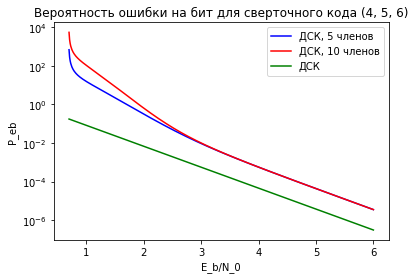

In [76]:
xx = [i * 0.01 for i in range(70, 601)]
yy = [p_e_b_dsk1(x) for x in xx]
yy2 = [p_e_b_dsk2(x) for x in xx]

plt.yscale('log')
plt.plot(xx, yy, 'b', label='ДСК, 5 членов')
plt.plot(xx, yy2, 'r', label='ДСК, 10 членов')
yyy = [math.e ** (-5.0/2 * x) for x in xx]
plt.plot(xx, yyy, 'g', label='ДСК')
plt.title('Вероятность ошибки на бит для сверточного кода (4, 5, 6)')
plt.xlabel('E_b/N_0')
plt.ylabel('P_eb')
plt.savefig('task8_7_1.png')
plt.legend()
plt.show()


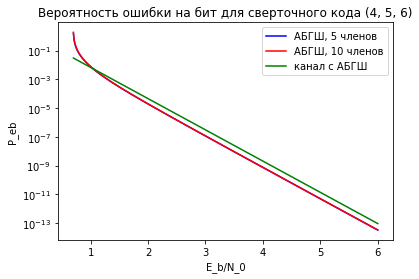

In [78]:
xx = [i * 0.01 for i in range(70, 601)]
yy = [p_e_b_abgsh1(x) for x in xx]
yy2 = [p_e_b_abgsh2(x) for x in xx]

plt.yscale('log')
plt.plot(xx, yy, 'b', label='АБГШ, 5 членов')
plt.plot(xx, yy2, 'r', label='АБГШ, 10 членов')
yyy2 = [math.e ** (-5.0 * x) for x in xx]
plt.plot(xx, yyy2, 'g', label='канал с АБГШ')
plt.title('Вероятность ошибки на бит для сверточного кода (4, 5, 6)')
plt.xlabel('E_b/N_0')
plt.ylabel('P_eb')
plt.savefig('task8_7_2.png')
plt.legend()
plt.show()


In [79]:
## Алгоритм Витерби

In [104]:
v = '011000101001011'

print('v =', v)

n = 4
L = len(v) // 3

# (вершина, последовательность, переход)
g = [[(0, '000', '0'), (2, '111', '1')],     
     [(0, '010', '0'), (2, '101', '1')],
     [(1, '001', '0'), (3, '110', '1')],
     [(1, '011', '0'), (3, '100', '1')]]

g_rev = [[] for i in range(n)]

for v_from in range(n):
    for v_to, seq, s in g[v_from]:
        g_rev[v_to].append((v_from, seq, s))

current_level = [(0, ''), (100, ''), (100, ''), (100, '')]
path = []

def metric(x, y):
    d = 0
    for i in range(len(x)):
        d += int(x[i] != y[i])
    return d


for i in range(L):
    next_level = [(-1, ''), (-1, ''), (-1, ''), (-1, '')]
    for v_to in range(n):
        for v_from, seq, s in g_rev[v_to]:
            cur_m = current_level[v_from][0] + metric(seq, v[3 * i:3 * i + 3]) 
            if next_level[v_to][0] == -1 or cur_m < next_level[v_to][0]:
                next_level[v_to] = (cur_m, current_level[v_from][1] + s)
    current_level = next_level

print(current_level)
min_pos = 0
for i in range(n):
    if current_level[i][0] < current_level[min_pos][0]:
        min_pos = i
print('answer =', current_level[min_pos][1])
print('minimum metric =', current_level[min_pos][0])

v = 011000101001011
[(3, '10100'), (5, '10110'), (4, '10101'), (8, '00011')]
answer = 10100
minimum metric = 3


In [ ]:
пример работы:
input u = 10101
v = 111001101001101

1 ошибка
v = 111000101001101
декодировал верно

2 ошибки
v = 111000101001001
декодировал верно

3 ошибки
v = 011000101001001
декодировал верно

4 ошибки
v = 011000101001011
декодировал неверно (10100)
